# Практика

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline



## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [113]:
# ваш код тут
# для рассмотрения берем распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genlogistic.html#scipy.stats.genlogistic
genlogistic_rv = sts.genlogistic(0.567)
sample = genlogistic_rv.rvs(100)
sample

array([-3.08850810e+00, -2.18254274e+00,  8.11286257e-01, -7.98186191e-01,
        1.19112442e+00,  1.69466594e+00,  1.58283236e+00,  1.34720239e+00,
        7.48246262e-01, -5.92657768e-02, -9.79321989e-01, -2.02203590e-01,
       -2.96901845e+00, -6.43671305e-01, -5.32098350e+00,  1.38128204e+00,
       -4.55205290e+00, -5.75371098e+00,  3.36862140e-01, -8.48761754e-01,
       -2.11635892e+00, -4.29144685e+00, -4.58798839e+00, -1.12980633e+00,
        6.63212824e-01,  5.30316644e-01,  3.45458607e+00,  2.87120314e+00,
       -4.88267732e+00, -8.31628784e-01, -1.28668224e+00, -2.35135079e+00,
       -4.52077017e+00,  2.13869088e-01,  8.09341367e-02, -3.14071178e+00,
        4.87065083e-02, -1.12758792e-03, -4.21265056e+00,  4.67331440e+00,
       -9.94972874e-01,  6.03728540e-01,  1.32043297e-01, -1.11845949e+00,
        2.81668470e-01, -1.57072337e+00, -2.32206521e+00, -2.21970112e+00,
       -2.38723372e+00, -2.29366945e+00,  1.17122832e+00,  7.17690536e-01,
       -1.06120456e+00,  

In [114]:
sample.dtype

dtype('float64')

In [115]:
real_mean = genlogistic_rv.mean() # настоящее среднее случайной величины

In [116]:
real_var = genlogistic_rv.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

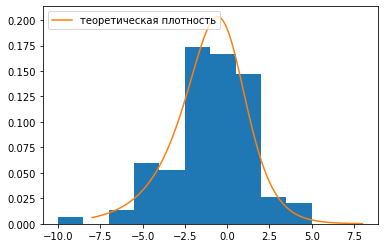

In [117]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-8,8,100)
pdf = genlogistic_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=1 )
plt.legend()

In [118]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.9375052968077712
5.670029626139299


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

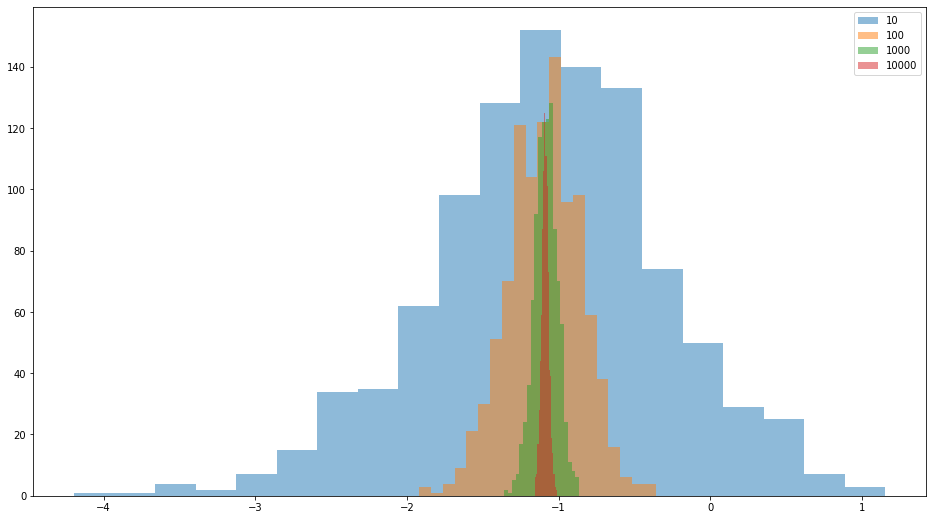

In [119]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(genlogistic_rv.rvs(N)))
    plt.hist(means, alpha=0.5, bins=20)

plt.legend(['10', '100', '1000', '10000'])
plt.show()


In [120]:
print('mean: ', genlogistic_rv.mean())
print('var:  ', genlogistic_rv.var())
print('std:  ', genlogistic_rv.std())

mean:  -1.0891234416202478
var:   5.637730641178792
std:   2.374390583113653


[]

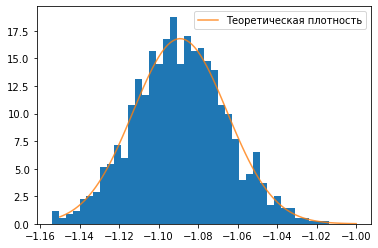

In [121]:
norm_rv = sts.norm(loc=genlogistic_rv.mean(), scale=genlogistic_rv.std()/ np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(-1.15,-1, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.8)
plt.legend()
plt.plot()

In [122]:

data = genlogistic_rv.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * genlogistic_rv.std() / np.sqrt(N), np.mean(data) + 1.96 * genlogistic_rv.std() / np.sqrt(N) 
))
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(confidence=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N)) # alternative 'two-sided' only
))


Доверительный интервал для среднего по цпт, если нам известна дисперсия: [-1.1644281302992643, -1.0713520194412092] 
Доверительный интервал для среднего по цпт интервальная оценка: (-1.1647109933199666, -1.0710691564205068) 


Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [124]:
'''Для данного распределения  апроксимация выборочного среднего работает хорошо , 
так как среднее попадает в доверительный интервал.'''

'Для данного распределения  апроксимация выборочного среднего работает хорошо , \nтак как среднее попадает в доверительный интервал.'

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [126]:
import statsmodels.stats.weightstats as ssw

In [ ]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [99]:
stay = df.loc[df['churn'] == False]['total day calls'].tolist()
gone = df.loc[df['churn'] == True]['total day calls'].tolist()

In [127]:

data = stay
print('По оставшимся клиентам')
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * np.sqrt(np.var(data)/len(data)), np.mean(data) + 1.96 * np.sqrt(np.var(data)/len(data))) 
)
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(confidence=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(len(data))) # alternative 'two-sided' only
))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

По оставшимся клиентам
Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.55630252675442, 101.01001326271927] 
Доверительный интервал для среднего по цпт интервальная оценка: (99.55618833318324, 101.01012745629045) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274126, 101.52482464673243) 


In [128]:

data = gone
print('По ущедшим клиентам')
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * np.sqrt(np.var(data)/len(data)), np.mean(data) + 1.96 * np.sqrt(np.var(data)/len(data))) 
)
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(confidence=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(len(data))) # alternative 'two-sided' only
))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

По ущедшим клиентам
Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.41262047786196, 103.2581869755542] 
Доверительный интервал для среднего по цпт интервальная оценка: (99.41066229112079, 103.26014516229537) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


In [ ]:
#Доверительные интерваля частично пересекаются , и данные распределения тяжело будет использовать как фактор
#для определения уйдет или останется клиент.